<a href="https://colab.research.google.com/github/veyselberk88/Data-Science-Tools-and-Ecosystem/blob/main/lec30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="./ccsf.png" alt="CCSF Logo" width=200px style="margin:0px -5px">

# Lecture 30: Sample Size

Associated Textbook Sections: [14.6](https://ccsf-math-108.github.io/textbook/chapters/14/6/Choosing_a_Sample_Size.html)

---

## Outline

* [Confidence Intervals](#Confidence-Intervals)
* [Sample Proportions](#Sample-Proportions)

---

## Set Up the Notebook

In [ ]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

---

## Confidence Intervals

---

### Graph of the Distribution

<img src="./approx_dist_sample_ave.png" width=50%>

---

### The Key to 95% Confidence

<img src="./95_confidence.png" width=80%>

* For about 95% of all samples, the sample average and population average are within 2 SDs of each other.
* SD = SD of sample average = $(\text{population SD}) / \sqrt{\text{sample size}}$


---

### Constructing the Interval

For about 95% of all samples,

* If you stand at the population average and look two SDs on both sides, you will find the sample average.
* Distance is symmetric.
* So if you stand at the sample average and look two SDs on both sides, you will capture the population average.


---

### The Interval

<img src="./the_interval_mean.png" width=80%>

---

### Width of the Interval

Total width of a 95% confidence interval for the population average

* $=  4 * \text{SD of the sample average}$
* $=  4 * (\text{population SD}) / \sqrt{\text{sample size}}$
* The $\text{population SD}$ is unknown in practice...


---

## Sample Proportions

---

### Proportions are Averages

* Data: 1 1 1 1 0 0 0 0 0 0 (10 entries)
    * Sum  =  4  (number of 1's)
    * Average  =  4/10  =  0.4 (proportion of 1's)
* If the population consists of 1's and 0's (yes/no answers to a question), then:
    * the population average is the proportion of 1's in the population
    * the sample average is the proportion of 1's in the sample


In [ ]:
number_of_ones = 4
zero_one_population = np.append(np.ones(number_of_ones),
                                np.zeros(10 - number_of_ones))
zero_one_population

array([ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
np.mean(zero_one_population)

0.40000000000000002

---

### Confidence Interval

<img src="./the_interval_prop.png" width=80%>

---

### Controlling the Width

* Total width of an approximate 95% confidence interval for a population proportion is equal to

$$\text{width of 95\% confidence interval} = 4 * \left(\frac{\text{SD of 0/1 population}}{\sqrt{\text{sample size}}}\right)$$

* The narrower the interval, the more precise your estimate.
* Suppose you want the total width of the interval to be no more than 1%. How should you choose the sample size?


---

### The Sample Size for a Given Width

* From Formula: $0.01  =  4 * \left(\frac{\text{SD of 0/1 population}}{\sqrt{\text{sample size}}}\right)$
    * Left side: 1%, the max total width that you'll accept
    * Right side: formula for the total width
* Re-arrange: $\sqrt{\text{sample size}} =  4 * \left(\frac{\text{SD of 0/1 population}}{0.01}\right)$
* Result: $\text{sample size} = \left(4 * \left(\frac{\text{SD of 0/1 population}}{0.01}\right)\right)^2$

---

### Demo: SD of 0/1 Population

* Calculate the SD of the 0/1 population
* Make a graph with proportion of ones on the x axis and SD on the y axis.

In [ ]:
zero_one_population

array([ 1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [ ]:
np.std(zero_one_population)

0.48989794855663565

In [ ]:
def sd_of_zero_one_population(number_of_ones):
    """
    SD of a population with num_ones ones
    and (10 - num_ones) zeros
    """
    zero_one_population = np.append(np.ones(number_of_ones),
                                    np.zeros(10 - number_of_ones))
    return np.std(zero_one_population)

In [ ]:
possible_oness = np.arange(11)
zero_one_pop = Table().with_columns(
    'Number of ones', possible_oness,
    'Proportion of ones', possible_oness / 10
)

In [ ]:
sds = zero_one_pop.apply(sd_of_zero_one_population, 'Number of ones')
zero_one_pop = zero_one_pop.with_column('SD', sds)

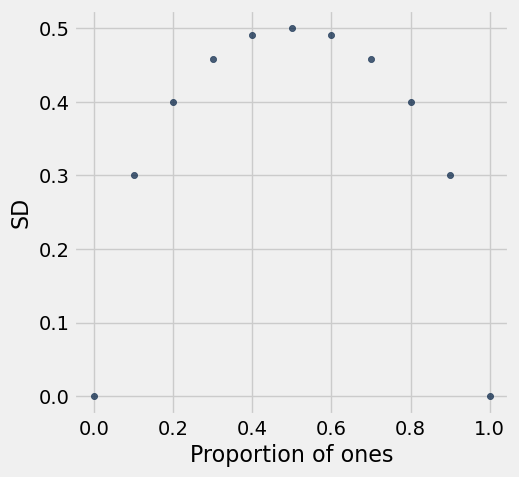

In [ ]:
zero_one_pop.scatter('Proportion of ones', 'SD')

---

### "Worst Case" Population SD

* $\sqrt{\text{sample size}} =  4 * \left(\frac{\text{SD of 0/1 population})}{0.01}\right)$
* SD of 0/1 population **is at** most 0.5
* $\text{sample size} \geq  \left(4 * \left(\frac{0.5}{0.01}\right)\right)^ 2   =   40000$
* The sample size should be 40,000 or more


---

### Demo: CI Width

<img src="./poll_scientific_american.png" alt="Scientific American article with the headline reading: How can a poll of only 1,004 Americans represent 260 million people with only a 3 percent margin of error?" width=40%>

* A researcher is estimating a population proportion based on a random sample of size 1,004.
* With chance at least 95%, the estimate will be correct to within 3%.
* A 3% margin of error translates to an interval width of 6%.

In [ ]:
CI_width = 4 * 0.5 / np.sqrt(1004)
CI_width

0.063119440309780311

---

### Demo: Margin of Error

* A researcher is estimating a population proportion based on a random sample of size 10,000.
* With a confidence level of 95%, the estimate will be correct to within how many percentage points?

In [ ]:
width = 4 * 0.5 / np.sqrt(10000)
margin_of_error = width / 2
margin_of_error_percent = margin_of_error * 100
margin_of_error_percent

1.0

---

### Demo: Sample Size

* I am going to use a 68% confidence interval to estimate a population proportion.
* I want the total width of my interval to be no more than 2.5\%.
* How large must my random sample be?
* $2 \cdot \left(\frac{0.5}{\sqrt{\text{sample\_size}}}\right) = 0.025$
* In other words: $\text{sample\_size} = \left(2 * \left(\frac{0.5}{0.025}\right)\right)^2$


In [ ]:
sample_size = (2 * 0.5 / 0.025) ** 2
sample_size

1600.0

---

## Attribution

This content is licensed under the <a href="https://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License (CC BY-NC-SA 4.0)</a> and derived from the <a href="https://www.data8.org/">Data 8: The Foundations of Data Science</a> offered by the University of California, Berkeley.

<img src="./by-nc-sa.png" width=100px>